# Capstone Project

### Employee-Attrition-Prediction

- Problem Statement:
  
  - Prepare a model for the HR Department to predict the attrition and give the insights from the data about the important
    factors associated with the attrition so that HR can take the corrective or preventive measures to stop or control the
    attrition


### Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Data

In [2]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

In [5]:
# making a copy of the data
Attrition_df = data  

In [6]:
Attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [7]:
Attrition_df.shape

(2940, 35)

In [8]:
# 2940 rows and 35 columns

In [9]:
Attrition_df.columns      # Displaying the main features

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
Attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

### Checking for Null/Missing values

In [14]:
Attrition_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
# Inference : There are no missing values available in the data

### Checking for Duplicates

In [18]:
Attrition_df.duplicated().sum()

0

In [19]:
# There are no duplicate data available

### Dropping Irrelavant columns

In [20]:
Attrition_df.drop(columns = ['EmployeeNumber','EmployeeCount','Over18','StandardHours'], inplace = True)

# dropping employee number as it is a mere identification data of the employee and won't leave any impact in the analysis
# Employee count, Over18 and StandardHours, all three columns has constatnt value and don't have any impact on the data in-
# analytical point of view

In [22]:
Attrition_df.shape

(2940, 31)

In [23]:
Attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Visual Representation and Analysis

### Employee Attrition Count and Percentage

In [32]:
Attrition_df.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

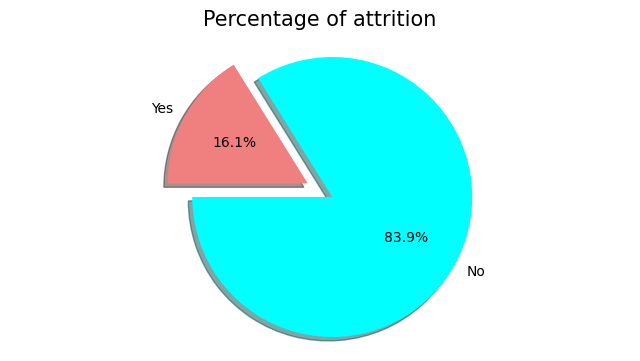

In [35]:
labels = 'No', 'Yes'
sizes = [2466,474]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
 
plt.figure(figsize=(8,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of attrition", fontsize=15, y=1.03)
plt.axis('equal');

In [ ]:
# Insight : The overall attrition percentage of the firm is 16.1%, i.e class 0 dominates over class1

### Departmentwise attrition rate

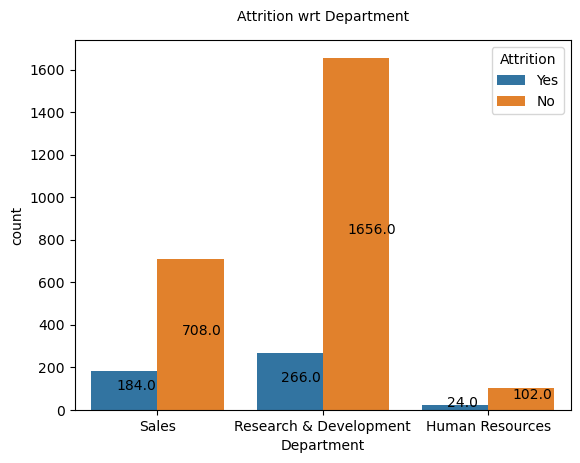

In [80]:
ax = sns.countplot(x='Department', hue='Attrition', data=Attrition_df)

for patch in ax.patches:
    value = patch.get_height()
    x = patch.get_x() + 0.15
    y = value / 2
    
    plt.annotate(value, (x, y))

plt.title("Attrition wrt Department", fontsize=10, y=1.03)
    
plt.show()

In [79]:
# Insight : Percentage of attrition for sales Department is higher as compared to other two departments

### Job Role Vs Attrition

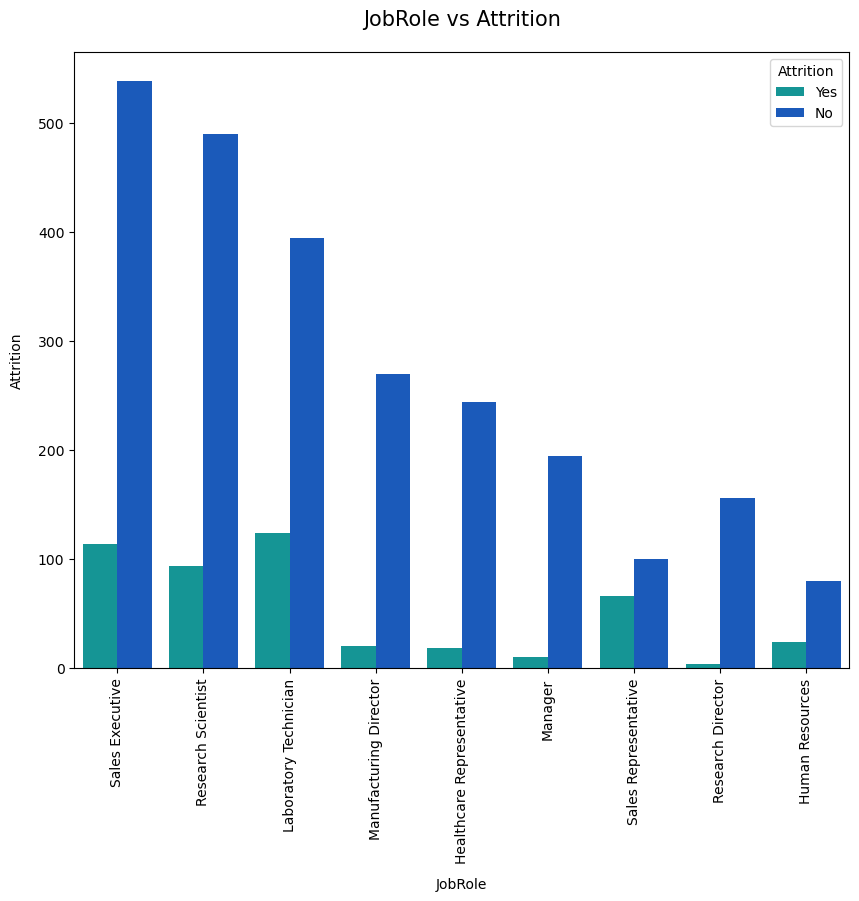

In [193]:
plt.figure(figsize=(10,8))
sns.countplot(x="JobRole", palette="winter_r", data=Attrition_df, hue = 'Attrition')
plt.title("JobRole vs Attrition", fontsize=15, y=1.03)
plt.xlabel("JobRole", labelpad=10)
plt.ylabel("Attrition", labelpad=10)
plt.xticks(rotation=90);

In [194]:
# Attrition rate of employees in Job roles associated with Sales Department is more as compared to others

### Relationship between age and Attrition

<Figure size 600x200 with 0 Axes>

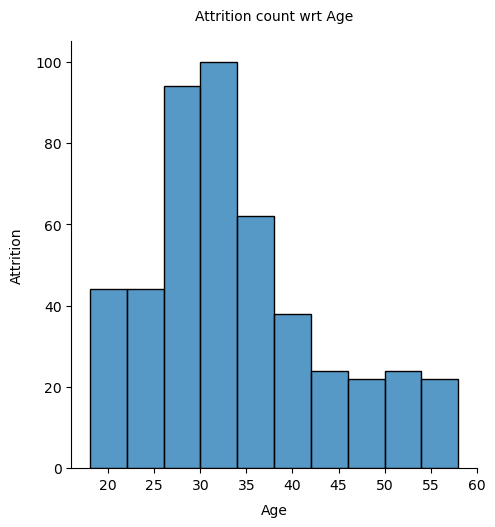

In [110]:
data = Attrition_df[Attrition_df['Attrition'] == 'Yes']     # data for which attrition is 'Yes'/data for employee leaving organization
plt.figure(figsize=(6,2))
sns.displot(x='Age', data=data, bins=10)
plt.title("Attrition count wrt Age", fontsize=10, y=1.03)
plt.xlabel("Age", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);
plt.show()

In [111]:
# Insight : Attrition count is at it's peak for people in the age group 30-35(mid career level employees)
#it can be infered from graph that people in the age group 25-35 shows tendency to leave the organization.

### Relationship between Buisiness Travel and Attrition

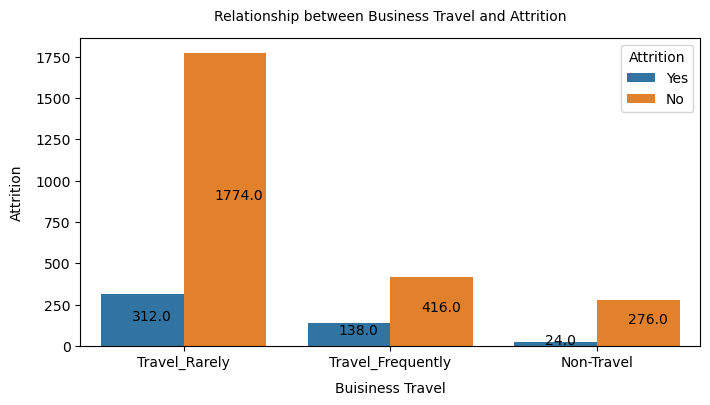

In [143]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=Attrition_df)

for patch in ax.patches:
    value = patch.get_height()
    x = patch.get_x() + 0.15
    y = value / 2
    
    plt.annotate(value, (x, y))

plt.title("Relationship between Business Travel and Attrition", fontsize=10, y=1.03)
plt.xlabel("Buisiness Travel", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

plt.show()

In [ ]:
# Insight : Relationship between Business Travel and Attrition shows that the attrition rate is more for people who travels 
# frequently

### Attrition Vs DistanceFromHome

Text(0, 0.5, 'DistanceFromHome')

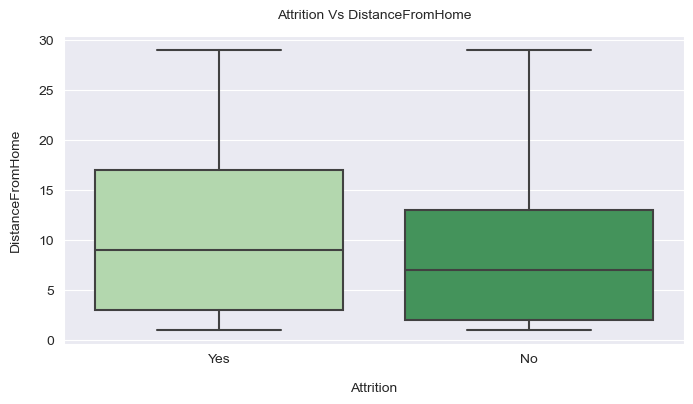

In [209]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Attrition", y="DistanceFromHome", palette="Greens", data=Attrition_df)
plt.title("Attrition Vs DistanceFromHome", fontsize=10, y=1.03)
plt.xlabel("Attrition", fontsize=10, labelpad=12)
plt.ylabel("DistanceFromHome", fontsize=10, labelpad=12)

In [ ]:
# Interpretation : As distance from home increases employee attrition rate tends to increase
# From both the analysis above it can be observed that whenever there is more travel involved, be it buisiness travel or
# distance from home, attrition rate tends to increase

### Attrition Vs Gender

In [170]:
Gender_df = Attrition_df.groupby('Gender')['Attrition'].value_counts()
Gender_df

Gender  Attrition
Female  No           1002
        Yes           174
Male    No           1464
        Yes           300
Name: Attrition, dtype: int64

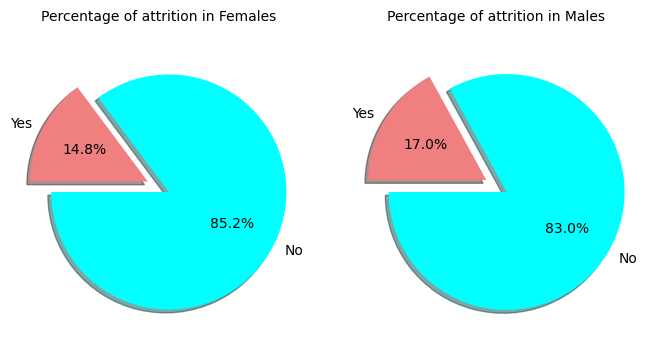

In [174]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
labels = 'No', 'Yes'
sizes = [1002,174]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of attrition in Females", fontsize=10, y=1.03)
plt.axis('equal');

plt.subplot(1,2,2)
labels = 'No', 'Yes'
sizes = [1464,300]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of attrition in Males", fontsize=10, y=1.03)
plt.axis('equal');


In [175]:
# Insight : Percentage of Attrition in Males is more as compared to Females

### Marital Status Vs Attrition

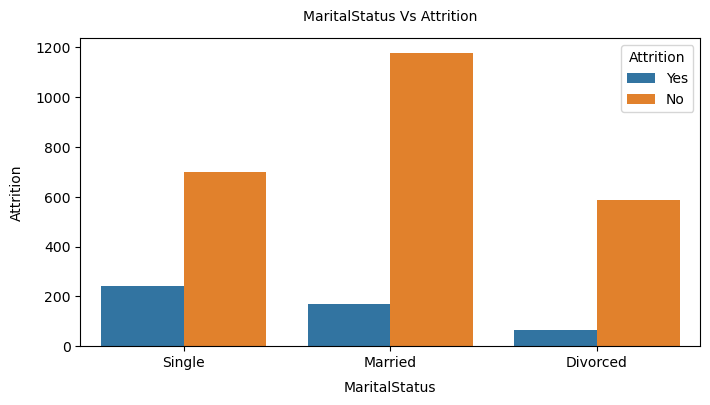

In [185]:
plt.figure(figsize = (8,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=Attrition_df)
plt.title("MaritalStatus Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("MaritalStatus", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

In [ ]:
# Insight : Attrition rate among singles is higher as compared to married and divorced people

### Analysis of Employee Satisfaction Features

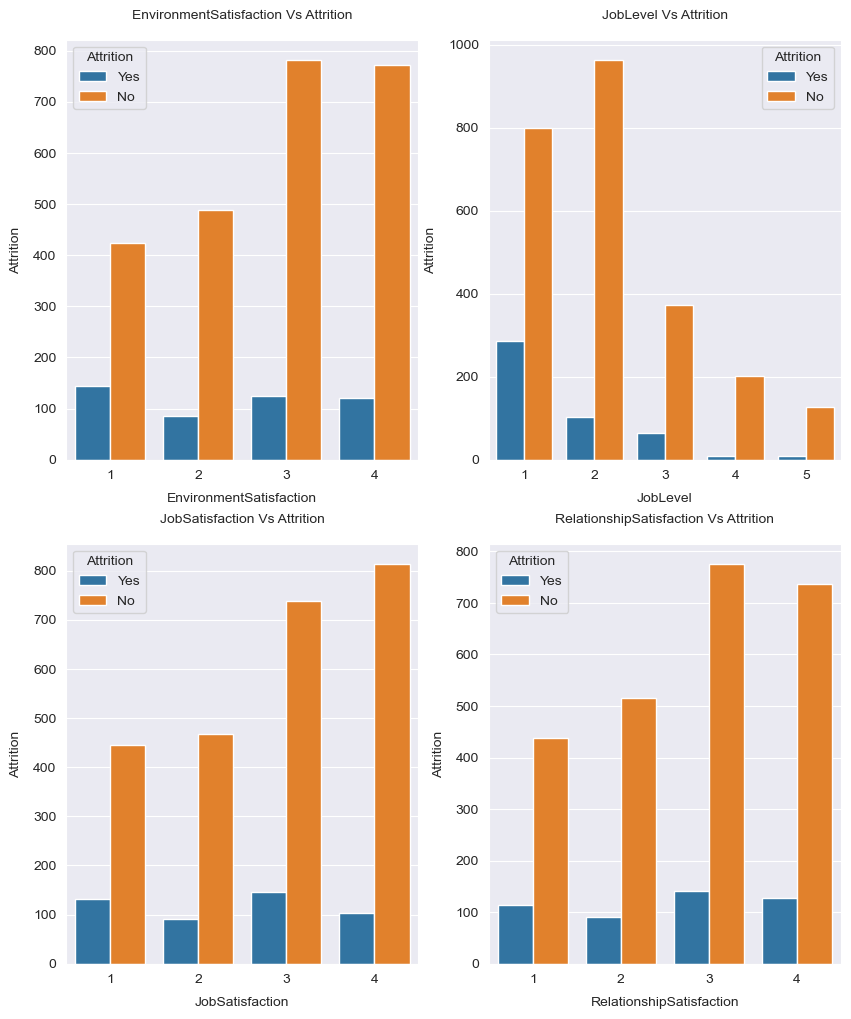

In [254]:
plt.figure(figsize = (10,12))
plt.subplot(2,2,1)
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=Attrition_df)
plt.title("EnvironmentSatisfaction Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("EnvironmentSatisfaction", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

plt.subplot(2,2,2)
sns.countplot(x='JobLevel', hue='Attrition', data=Attrition_df)
plt.title("JobLevel Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("JobLevel", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

plt.subplot(2,2,3)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=Attrition_df)
plt.title("JobSatisfaction Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("JobSatisfaction", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

plt.subplot(2,2,4)
sns.countplot(x='RelationshipSatisfaction', data= Attrition_df, hue='Attrition')
plt.title("RelationshipSatisfaction Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("RelationshipSatisfaction", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

In [255]:
# Interpretation :
#1. Higher the Environment satisfaction rating lower the attrition
#2. Higher the Joblevel lower the attrition, i.e people at lower level are always looking for better oppurtunities hence
#   higher attrition.
#3. Higher the Job satisfaction, lower the attrition
#4. Those who had good relationships with managers showed lesser tendency to leave the organisation than others

### Analysis of Employee Ratings and Involvement vs Attrition

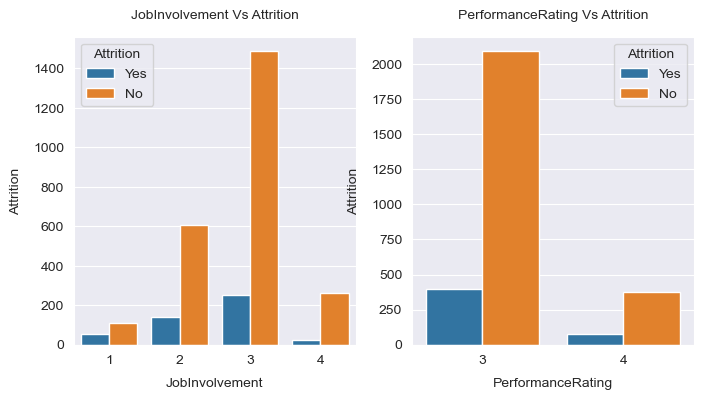

In [288]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x='JobInvolvement', hue='Attrition', data=Attrition_df)
plt.title("JobInvolvement Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("JobInvolvement", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

plt.subplot(1,2,2)
sns.countplot(x='PerformanceRating', hue='Attrition', data=Attrition_df)
plt.title("PerformanceRating Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("PerformanceRating", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

In [ ]:
#Interpretation : Attrition rate among people with better JobInvolvement and Performance rating is lesser compared to others

### Relationship Between OverTime and WorkLifeBalance Features With Attrition

In [318]:
OverTime_df = Attrition_df.groupby('OverTime')['Attrition'].value_counts()

In [319]:
OverTime_df

OverTime  Attrition
No        No           1888
          Yes           220
Yes       No            578
          Yes           254
Name: Attrition, dtype: int64

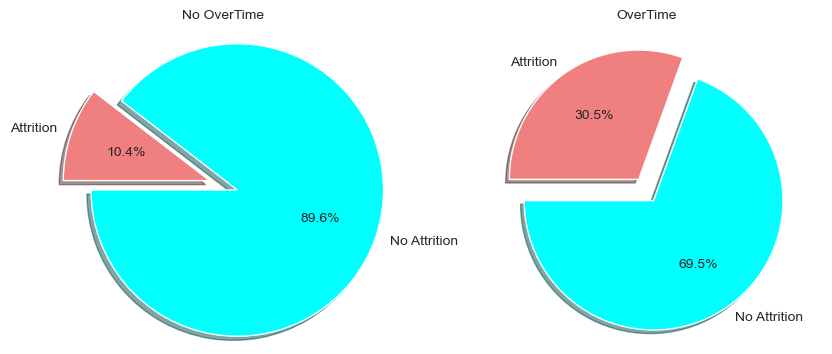

In [317]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
labels = 'No Attrition', 'Attrition'
sizes = [1888,220]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("No OverTime", fontsize=10, y=1.03)
plt.axis('equal');

plt.subplot(1,2,2)
labels = 'No Attrition', 'Attrition'
sizes = [578,254]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("OverTime", fontsize=10, y=1.03)
plt.axis('equal');

In [ ]:
# Insight : Attrition percentage is higher for people who works overtime

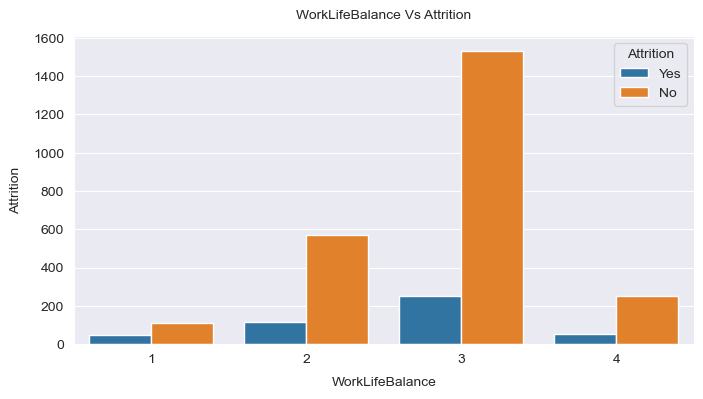

In [321]:
plt.figure(figsize = (8,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=Attrition_df)
plt.title("WorkLifeBalance Vs Attrition", fontsize=10, y=1.03)
plt.xlabel("WorkLifeBalance", fontsize=10, labelpad=8)
plt.ylabel("Attrition", fontsize=10, labelpad=8);

In [322]:
#Insight : Attrition Rate is higher for people with lesser work life balance

### Analysis of Experiance Features

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

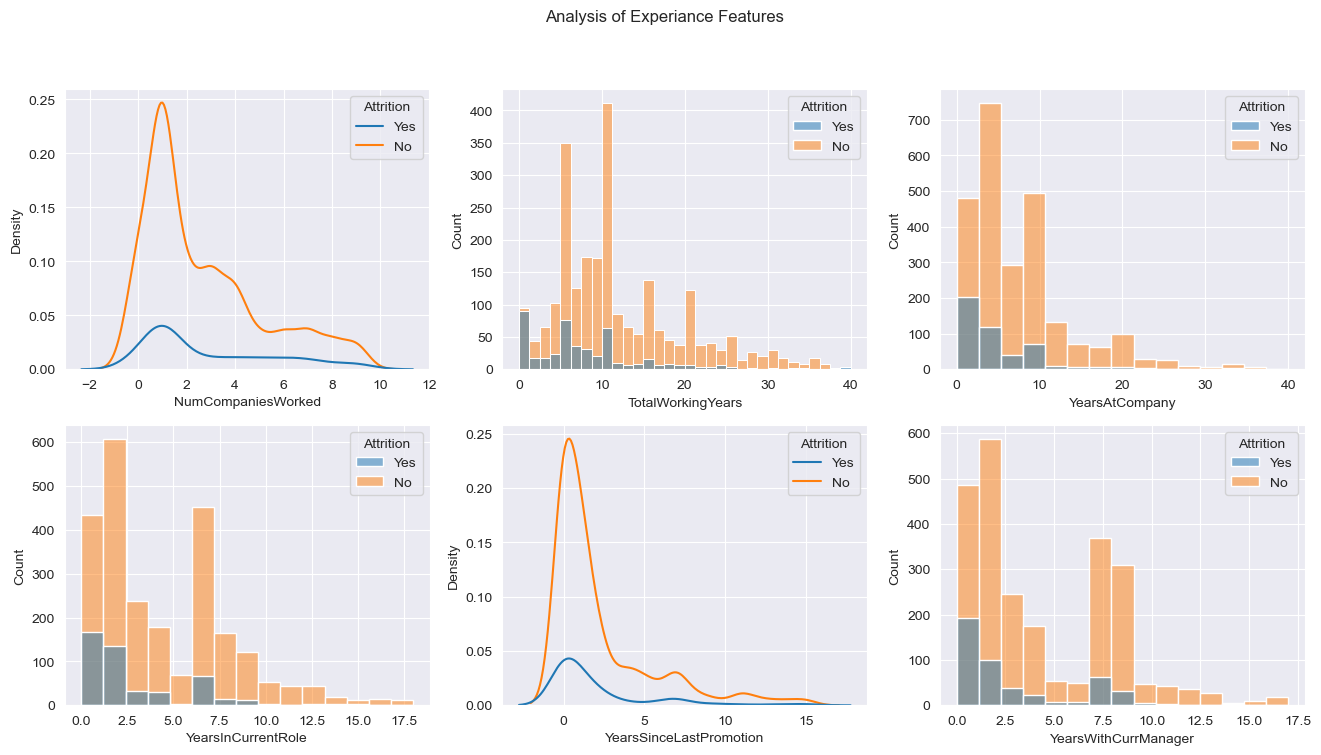

In [392]:
plt.figure(figsize= (16,8))

plt.suptitle('Analysis of Experiance Features')

plt.subplot(2,3,1)
sns.kdeplot(x='NumCompaniesWorked', hue='Attrition', data = Attrition_df)

plt.subplot(2,3,2)
sns.histplot(x='TotalWorkingYears', hue='Attrition', data=Attrition_df)


plt.subplot(2,3,3)
sns.histplot(x='YearsAtCompany', hue='Attrition', data=Attrition_df, bins=15)


plt.subplot(2,3,4)
sns.histplot(x='YearsInCurrentRole', data= Attrition_df, hue='Attrition', bins=15)

plt.subplot(2,3,5)
sns.kdeplot(x='YearsSinceLastPromotion', data=Attrition_df, hue= 'Attrition')

plt.subplot(2,3,6)
sns.histplot(x='YearsWithCurrManager', data=Attrition_df, hue = 'Attrition', bins = 15)

In [393]:
# Interpretation: 
#People those who have workded in less than 2 or more companies shows tendancy to leave the organisation
# Attrition rate is more in employees those who have less than 5 years of experiance
# Atrition rate is very less in employees those who are associated with the company for a long time
# Trend shows people remain in the same role only for shorter periods of time and are leaving the role/company for better prospects
# Attrition rate is higher when there is low oppurtunity for career growth

### Analysis of Attrition with Income and Salary Hike

Text(0.5, 1.03, 'PercentSalaryHike Vs Attrition')

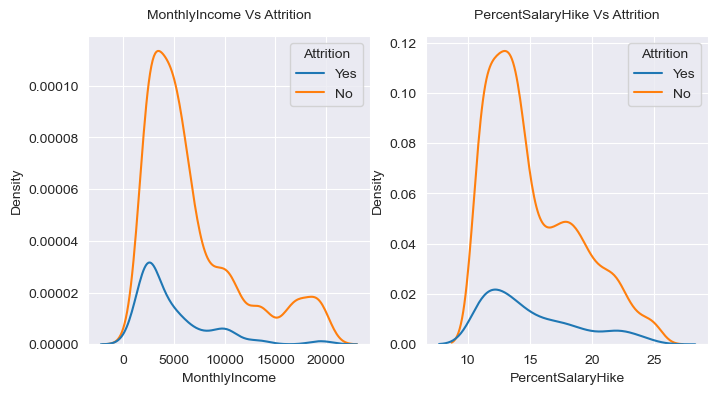

In [408]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.kdeplot(x='MonthlyIncome', data=Attrition_df, hue= 'Attrition')
plt.title("MonthlyIncome Vs Attrition", fontsize=10, y=1.03)

plt.subplot(1,2,2)
sns.kdeplot(x='PercentSalaryHike', data = Attrition_df, hue = 'Attrition')
plt.title("PercentSalaryHike Vs Attrition", fontsize = 10, y =1.03)

In [ ]:
# Insight : Lesser the Monthly Income and Percent of Salary Hike higher the attrition 

- As per the Exploratory Data Analysis the most prominent factors contributing to Attrition are:
  - Overtime and worklife balance: People those who had to work overtime and who has low worklfe balance are leaving the company
    since both overtime and worklife balance are interrelated, taking suitable measures to improve worklife balance of the
    employees can be effective in retention of the workforce
  - Another common trend is attrition among employees in sales department, it may be related to the increased travelling
    as compared to other departments, as attrition rate among people who travel frequently is also higher. Providing better
    travel allowances and benefits for those who have to travel frequently may reduce attrition rate
  - People with low income, salary hike and very less career development oppurtunities also tends to leave seeking better
    oppurtuites. Introducing a defined career growth plan and salaries at par with position and skills may attract the employees
    to stay back

### Outliers Check

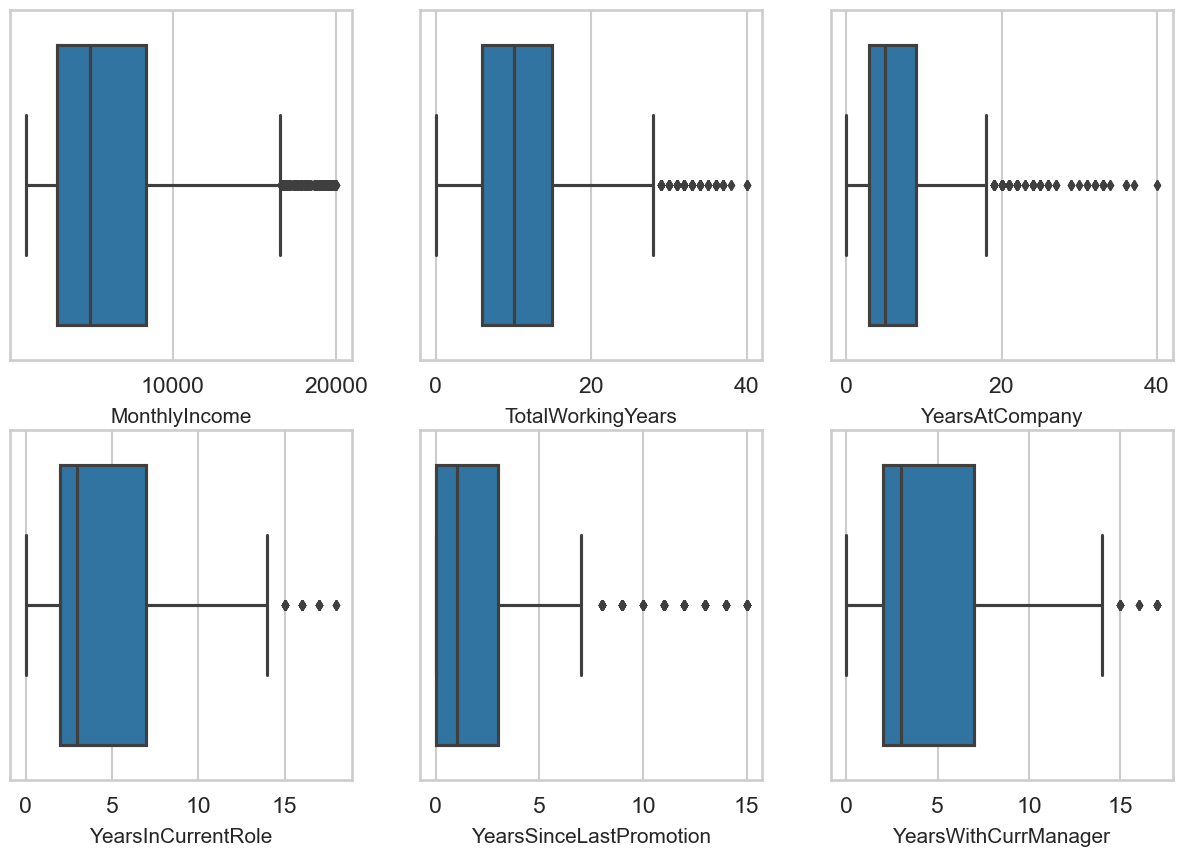

In [443]:
'''Using Boxplots we are checking for outliers in numeric continuous columns'''

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x='MonthlyIncome', data=Attrition_df,orient='h')
plt.xlabel("MonthlyIncome", fontsize=15, labelpad=8);

plt.subplot(2,3,2)
sns.boxplot(x='TotalWorkingYears', data=Attrition_df, orient='h')
plt.xlabel("TotalWorkingYears", fontsize=15, labelpad=8);

plt.subplot(2,3,3)
sns.boxplot(x='YearsAtCompany', data=Attrition_df, orient='h')
plt.xlabel("YearsAtCompany", fontsize=15, labelpad=8);

plt.subplot(2,3,4)
sns.boxplot(x='YearsInCurrentRole', data=Attrition_df, orient='h')
plt.xlabel("YearsInCurrentRole", fontsize=15, labelpad=8);

plt.subplot(2,3,5)
sns.boxplot(x='YearsSinceLastPromotion', data=Attrition_df, orient='h')
plt.xlabel("YearsSinceLastPromotion", fontsize=15, labelpad=8);

plt.subplot(2,3,6)
sns.boxplot(x='YearsWithCurrManager', data=Attrition_df, orient='h')
plt.xlabel("YearsWithCurrManager", fontsize=15, labelpad=8);

In [444]:
'''Since dropping of the outlier values cause data loss we are replacing the outlier values with q3 and q1 values at both end'''

def outlier_capping(col):
    q3=Attrition_df[col].quantile(0.75)
    q1=Attrition_df[col].quantile(0.25)
    
    upper=q3
    lower=q1
    
    Attrition_df[col].clip(lower,upper,inplace=True)

In [445]:
cols=['MonthlyIncome','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

for i in cols:
    outlier_capping(i)

### Correlation Check

In [448]:
Attrition_df.corr()    # checking for correlated features

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.441821,...,0.001904,0.053535,0.037510,0.605054,-0.019621,-0.021490,0.214402,0.184005,0.172699,0.172651
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.018609,...,0.000473,0.007846,0.042143,0.021495,0.002453,-0.037848,-0.015488,0.003472,-0.033669,-0.011707
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,0.014774,...,0.027110,0.006557,0.044872,0.015343,-0.036942,-0.026556,0.031341,0.028745,0.008490,0.014585
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.117167,...,-0.024539,-0.009118,0.018422,0.153549,-0.025100,0.009819,0.063709,0.055877,0.028616,0.057044
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.010170,...,-0.029548,0.007665,0.003432,-0.008993,-0.019359,0.027627,0.018456,0.030129,0.025751,0.010177
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.020659,...,-0.002172,0.001330,0.050263,-0.003342,-0.008548,-0.004607,-0.031153,-0.032361,-0.053143,-0.009657
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.033979,...,-0.029071,0.034297,0.021523,-0.005696,-0.015338,-0.014617,0.016887,0.013105,-0.009859,0.023585
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.869564,...,-0.021222,0.021642,0.013984,0.686632,-0.018191,0.037818,0.410227,0.364479,0.273461,0.346082
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.002074,...,0.002297,-0.012454,0.010690,-0.017994,-0.005779,-0.019459,0.017452,0.007660,0.010150,-0.014463
MonthlyIncome,0.441821,0.018609,0.014774,0.117167,-0.010170,-0.020659,-0.033979,0.869564,-0.002074,1.000000,...,-0.022651,0.018162,0.019010,0.637399,-0.024396,0.036324,0.421933,0.390150,0.255514,0.347417


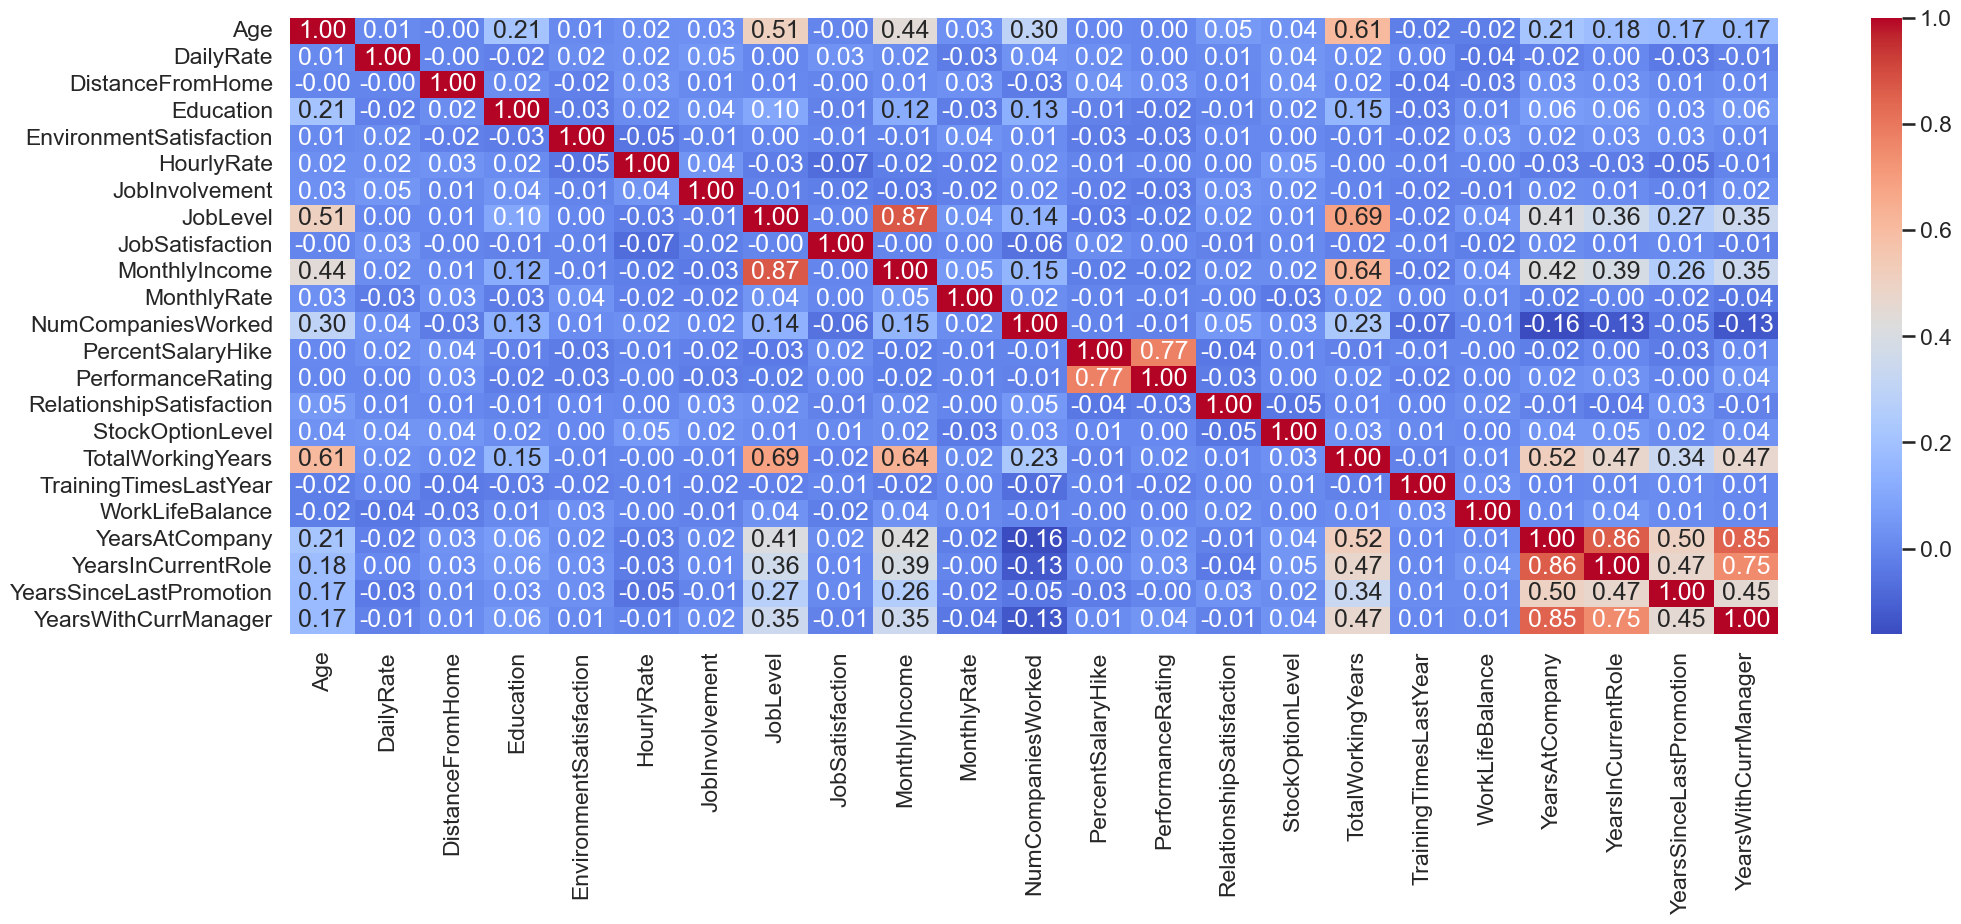

In [450]:
plt.figure(figsize=(24,8))
sns.heatmap(Attrition_df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.show()

In [ ]:
# Job level and Montlhy income are highly correlated features with a correlation coefficient of 0.87
# Total working Years is also positiovley correlated with Job Level and Monthly Income

## Model Building

In [451]:
Attrition_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,9,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,3,2,0,2
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,3,2,2,2


## Data Preprocessing

### Encoding of Data

In [452]:
''' As the first step here we are converting all the  object datatype variables to numerical format through data encoding'''

encoded_df = Attrition_df  # Making a copy of the data set to see encoded data and original data separately

object_cols = encoded_df.select_dtypes('object').columns   # Separating columns with data type as object

object_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [454]:
from sklearn.preprocessing import LabelEncoder             # Encoding categorical variables to numeric

le = LabelEncoder()

for col in object_cols:
    encoded_df[col] = le.fit_transform(encoded_df[col])

In [455]:
encoded_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,9,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,3,2,0,2
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,2
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,3,2,2,2


### Separating Independent and Target Variables

In [456]:
x = encoded_df.drop(['Attrition'], axis = 1).values      # All values except target variable assigned to x
y = encoded_df['Attrition'].values                       # Target Variable assigned to y

### Train - Test Split

In [457]:
from sklearn.model_selection import train_test_split    # splitting the data set to 80% trainig and 20% testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

## Model1 - Decision Tree

In [458]:
from sklearn.tree import DecisionTreeClassifier      # Importing all the necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [462]:
Decision_tree = DecisionTreeClassifier()

### Hyper parameter tuning using GridsearchCV

In [467]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

'''Here we are finding the best values of each parameter in the model using gridsearchCV and then the model is run utilizing
   these optimal parameters'''


param_dict = {
    "criterion" : ['gini'],
    "max_depth" : range(1,20),
    "min_samples_split" : range(10,20),
    "min_samples_leaf" : range(10,20)
}

model_dt = GridSearchCV(Decision_tree, cv = 10,
                     param_grid=param_dict, 
                     n_jobs = 3)     # Three models keep on running parallely

model_dt.fit(x_train,y_train)
print('Best Parameters using grid search: \n', model_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 19, 'min_samples_split': 12}


### Building the Decision Tree Model

In [473]:
''' Assigning the best parameters to the model'''

Decision_tree = DecisionTreeClassifier(random_state = 1, criterion = 'gini', max_depth = 8, min_samples_leaf = 19, min_samples_split = 12)
Decision_tree.fit(x_train,y_train)
Decision_tree_score_train = Decision_tree.score(x_train,y_train)
print("Training score: ", Decision_tree_score_train)
Decision_tree_score_test = Decision_tree.score(x_test, y_test)
print("Testing score: ", Decision_tree_score_test)

Training score:  0.8924319727891157
Testing score:  0.8656462585034014


### Performance Matrices

In [474]:
'''Evaluating the model using different model evaluation techniques like AUC and Confusion Matrix'''

y_pred_dt = Decision_tree.predict_proba(x_test)[:, 1] # Assigning predicted values of x_test to y_pred_dt to compare with y_test
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt) # checking the Fpr(1 predicted as 0) and Tpr(1 predicted as 1)
roc_auc_dt = auc(fpr_dt, tpr_dt)                 # Assigning Fpr and Tpr to auc function

In [475]:
predictions = Decision_tree.predict(x_test)   # predicitons of unseen data
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [476]:
y_actual_result = 0
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

### Recall

In [477]:
''' Checking for the accuracy of 1 predicted as 1'''

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.5526315789473685


### Area Under The Curve

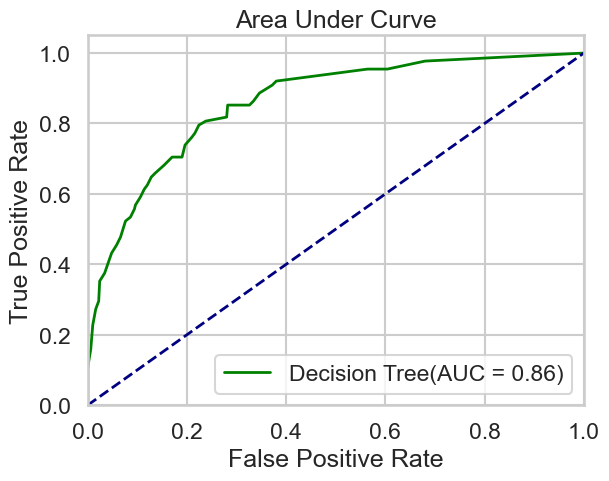

In [478]:
plt.figure(1)                                # Plotting AUC graph utilising fpr and tpr values
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [487]:
cnf_matrix = (confusion_matrix(y_test, predictions))     # Represents the accuracy of a classification model
print(cnf_matrix)

[[467  33]
 [ 46  42]]


In [480]:
accuracy_score(y_test, predictions)

0.8656462585034014

Text(0.5, 427.9555555555555, 'Predicted label')

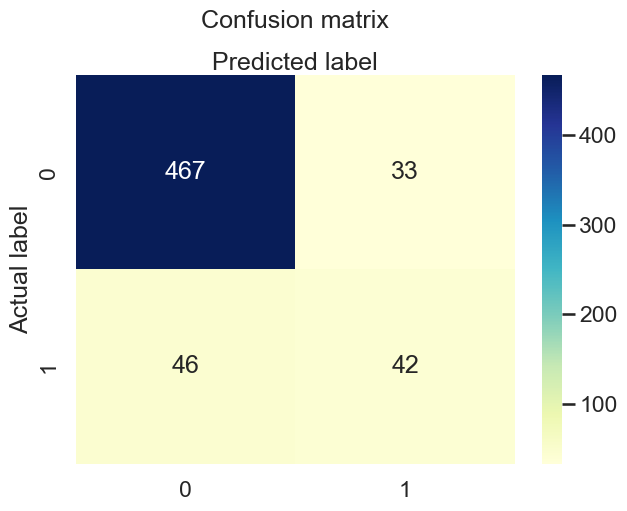

In [488]:
class_names=[0,1] # name  of classes              # Displays True Positive, False Positive, False Negative and True Negative
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Classification Report

In [619]:
print('Classification Report for Decision Tree:')      # Displays all the model evaluation parameters
print(classification_report(y_test, predictions))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       500
           1       0.56      0.48      0.52        88

    accuracy                           0.87       588
   macro avg       0.74      0.71      0.72       588
weighted avg       0.86      0.87      0.86       588



## Model 2 - Random Forest

In [489]:
import time
import random
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

### Random Forest classifier

In [491]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

### Hyper Parameter optimization using GridsearchCV

In [493]:
'''Finding the optimal values for all the parameters using gridsearchcv, except for n_estimators which will be found using
   Out of bag error rate method'''

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,10),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)    # Three models keep on running parallely

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}
Time taken in grid search:  496.61


In [494]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 9)

RandomForestClassifier(max_depth=9, max_features='auto', random_state=42)

### Out Of Bag Error Rate

In [514]:
''' Finding the best fit value for n_estimators by using OOB error rate '''
fit_rf.set_params(warm_start = False,
                   oob_score=True)

min_estimators = 50           # minimum no of trees 50
max_estimators = 1000           # maximum no of trees 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):    # oob error rate is calculated for different no of trees in the range of 50-1000
    fit_rf.set_params(n_estimators=i)      #here n_estimators will be 50,51...1000 as the loop runs
    fit_rf.fit(x_train,y_train)            # data set is passed to the model

    oob_error = 1 - fit_rf.oob_score_       # oob error rate is calculated
    error_rate[i] = oob_error               # error rate for each n_estimator value is added to the dictionary

In [515]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

50      0.078656
51      0.079507
52      0.080782
53      0.082483
54      0.082058
          ...   
996     0.075255
997     0.075680
998     0.075255
999     0.075255
1000    0.075680
Length: 951, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

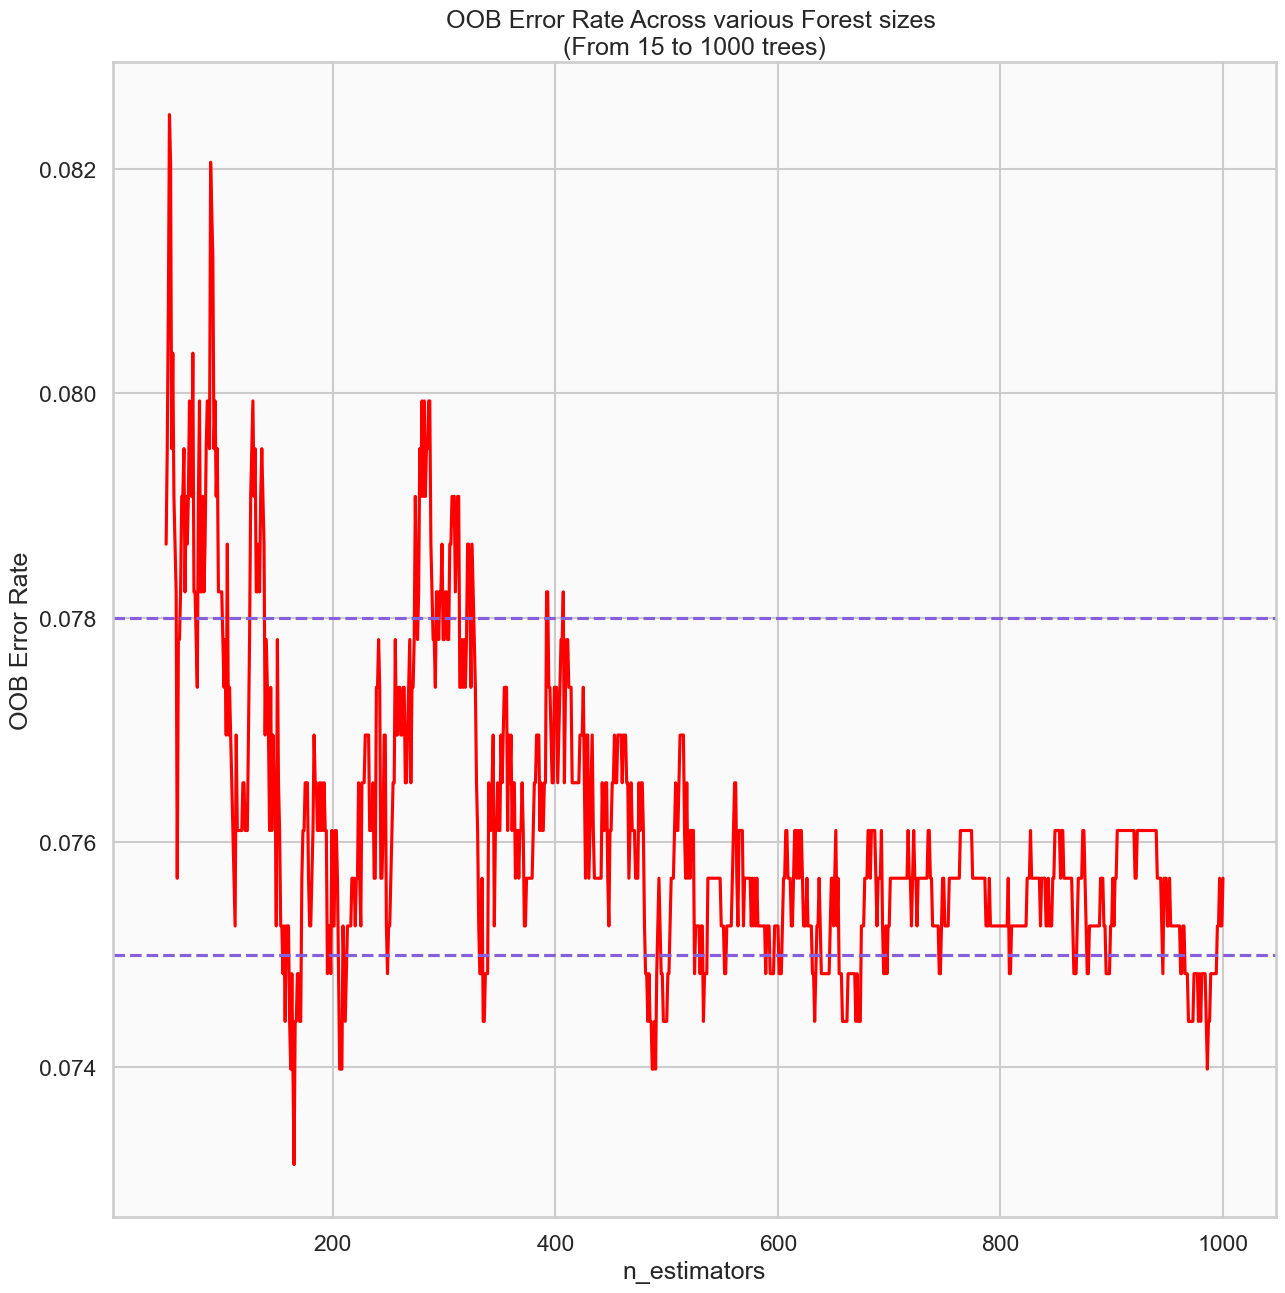

In [519]:
# out of bag error rate is plotted and the n_estimator value for which out of bag error rate is most stable is selected

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.078, color='#875FDB',linestyle='--')
plt.axhline(0.075, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [672]:
print('OOB Error rate for 750 trees is: {0:.5f}'.format(oob_series[750]))

OOB Error rate for 750 trees is: 0.07526


In [551]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=750,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=750,
                       random_state=42)

### Training the Random Forest

In [552]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=750,
                       random_state=42)

### Predictions and Evaluations

In [553]:
predictions_rf = fit_rf.predict(x_test)    # predicting the values for unseen test data

### Accuracy

In [554]:
Training_Accuracy = fit_rf.score(x_train,y_train)
Testing_Accuracy = fit_rf.score(x_test,y_test)

print("Here is our mean accuracy on the train set:\n {0:.3f}"\
      .format(Training_Accuracy))
print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(Testing_Accuracy))

Here is our mean accuracy on the train set:
 0.980
Here is our mean accuracy on the test set:
 0.956


### Precision and Recall

In [555]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, predictions_rf))
print("Precision:",metrics.precision_score(y_test, predictions_rf))
print("Recall:",metrics.recall_score(y_test, predictions_rf))

Accuracy: 0.95578231292517
Precision: 1.0
Recall: 0.7045454545454546


### Confusion Matrix

In [556]:
''' Used for calculating accuracy, i.e out of the test data how many times the model is able to predict 0's as 0 and 1 as 1'''

from sklearn.metrics import classification_report, confusion_matrix 
cnf_matrix = metrics.confusion_matrix(y_test, predictions_rf)
cnf_matrix  

array([[500,   0],
       [ 26,  62]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

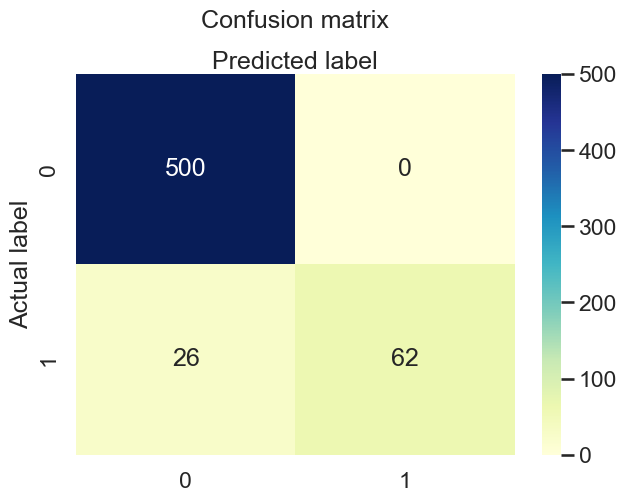

In [557]:
''' Plotting the confusion matrix for better readability'''

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Classification Report

In [559]:
print('Classification Report for Random Forest')
print(classification_report(y_test, predictions_rf))

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       500
           1       1.00      0.70      0.83        88

    accuracy                           0.96       588
   macro avg       0.98      0.85      0.90       588
weighted avg       0.96      0.96      0.95       588



### Area Under the curve Auc

In [560]:
''' AUC is how many times the model predicted 1 as 1, When AUC is higher TPR will be higher and model will be better'''

y_pred_rf = fit_rf.predict_proba(x_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

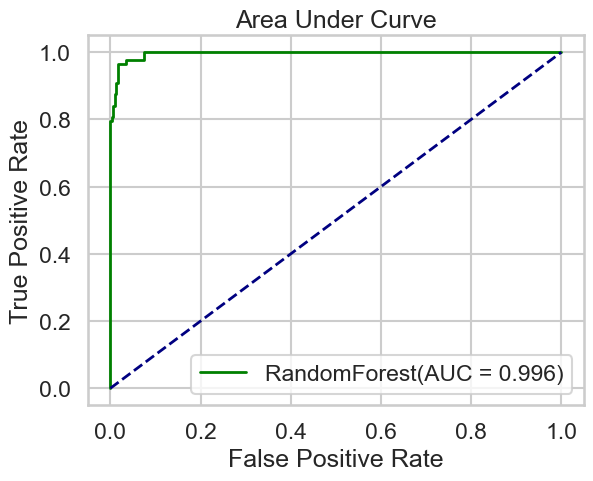

In [571]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='RandomForest(AUC = %0.3f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Feature Importance

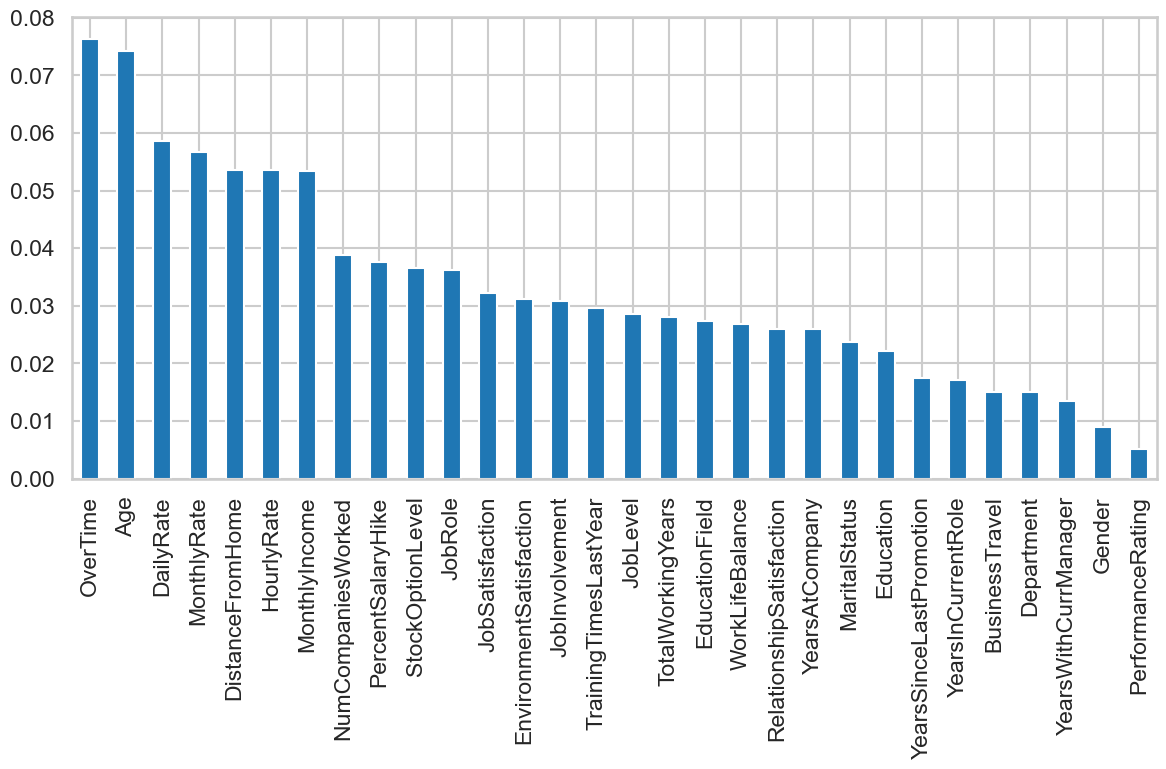

In [585]:
X = encoded_df.drop(['Attrition'], axis=1)
pd.Series(fit_rf.feature_importances_, index = X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(14,6));

#### According to the graph the most important feature for predicting the result is OverTime and Least important is Performance Rating

## Model3 - Support Vector Machine (SVM)

### Standardization

In [587]:
'''Standardization to be done as model is succeptible to biaseness due to the utilisation of euclidean distance in the 
   algorithm'''

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [588]:
from sklearn.svm import SVC     # importing Support Vector Classifier
svm_model= SVC()                # Default Hyper Parameters

### Hyper Parameter tuning Using GridSearchCV

In [602]:
tuned_parameters = {
 'C': (np.arange(1,20)) , 'kernel': ['linear','rbf','poly'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],    
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly','rbf','linear']
                   }

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

print(model_svm.best_params_)

0.9459989181391995
{'C': 0.8, 'degree': 4, 'gamma': 0.05, 'kernel': 'poly'}


In [610]:
svc=SVC(C=0.8, degree=4, gamma=0.05, kernel='poly', probability = True) 
svc.fit(x_train,y_train)

SVC(C=0.8, degree=4, gamma=0.05, kernel='poly', probability=True)

### Predictions and Evaluation

In [611]:
# Training and Testing Accuracy

Svm_Training_Accuracy = svc.score(x_train,y_train)
Svm_Testing_Accuracy = svc.score(x_test,y_test)

print("Here is our mean accuracy on the train set:\n {0:.3f}"\
      .format(Svm_Training_Accuracy))
print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(Svm_Testing_Accuracy))

Here is our mean accuracy on the train set:
 0.995
Here is our mean accuracy on the test set:
 0.974


In [612]:
y_pred=svc.predict(x_test)

### Precision, Recall and Prediciton accuracy

In [606]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9744897959183674
Precision: 0.9294117647058824
Recall: 0.8977272727272727


### Confusion Matrix

In [607]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[494,   6],
       [  9,  79]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

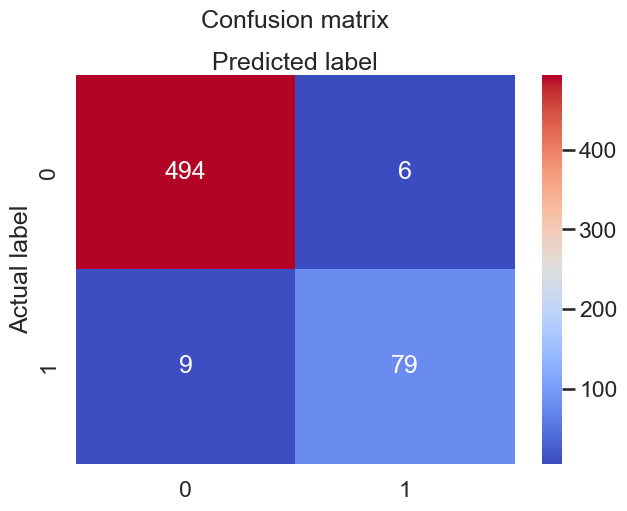

In [608]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Area Under The Curve

In [613]:
y_pred_svm = svc.predict_proba(x_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

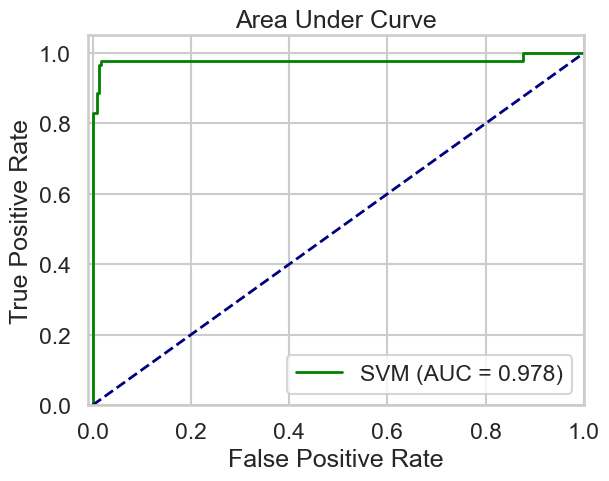

In [616]:
plt.figure(1)
lw = 2
plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='SVM (AUC = %0.3f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [617]:
print('Classification Report for SVM Model')
print(classification_report(y_test, y_pred))

Classification Report for SVM Model
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       500
           1       0.93      0.90      0.91        88

    accuracy                           0.97       588
   macro avg       0.96      0.94      0.95       588
weighted avg       0.97      0.97      0.97       588



## Model 4 - Logistic Regression Model

### Training the data

In [621]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression()

In [623]:
# Training and Testing Accuracy

logreg_Training_Accuracy = logreg.score(x_train,y_train)
logreg_Testing_Accuracy = logreg.score(x_test,y_test)

print("Here is our mean accuracy on the train set:\n {0:.3f}"\
      .format(logreg_Training_Accuracy))
print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(logreg_Testing_Accuracy))

Here is our mean accuracy on the train set:
 0.875
Here is our mean accuracy on the test set:
 0.886


### Predictions and Evaluations

In [622]:
y_pred_log = logreg.predict(x_test)
y_pred_log

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Precision, Recall and Accuracy

In [624]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.8860544217687075
Precision: 0.7333333333333333
Recall: 0.375


### Confusion Matrix

In [625]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[488,  12],
       [ 55,  33]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

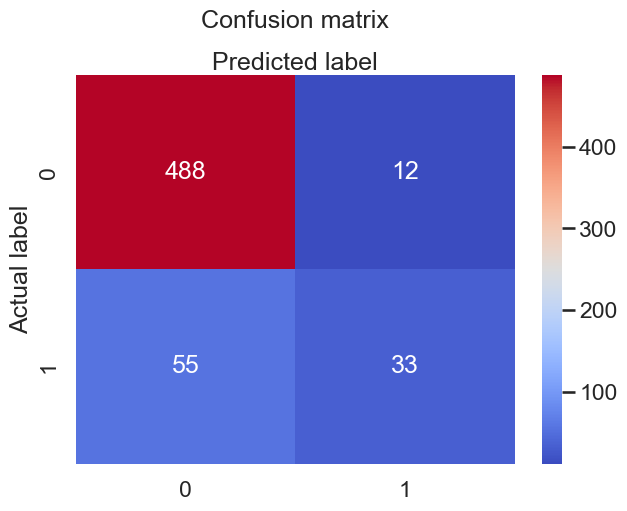

In [626]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Area Under The Curve

In [627]:
y_pred_logreg = logreg.predict_proba(x_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_logreg)
roc_auc_log = auc(fpr_log, tpr_log)

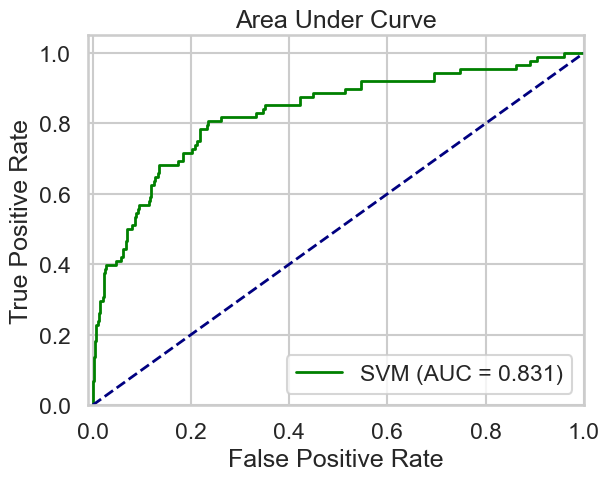

In [628]:
plt.figure(1)
lw = 2
plt.plot(fpr_log, tpr_log, color='green',
         lw=lw, label='SVM (AUC = %0.3f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [630]:
print('Classification Report for logistic regression:')
print(classification_report(y_test, y_pred_log))

Classification Report for logistic regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       500
           1       0.73      0.38      0.50        88

    accuracy                           0.89       588
   macro avg       0.82      0.68      0.72       588
weighted avg       0.87      0.89      0.87       588



## Model 5 - K Nearest Neighbour

### Detection of Optimal Value for K-Neighbours

In [631]:
from sklearn.neighbors import KNeighborsClassifier 

In [639]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1,100):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

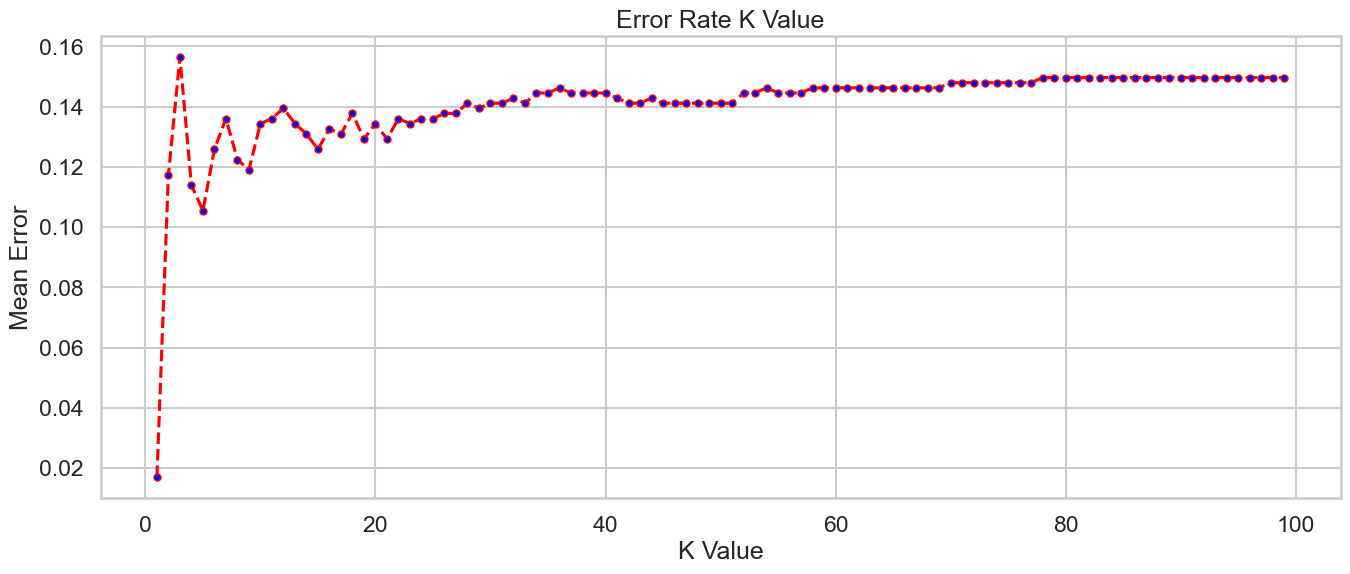

In [651]:
plt.figure(figsize=(16,6))  
plt.plot(range(1,100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

### Training the data

In [658]:
model_KNN = KNeighborsClassifier(n_neighbors=5)  
model_KNN.fit(x_train, y_train)  

KNeighborsClassifier()

In [659]:
# Training and Testing Accuracy

KNN_Training_Accuracy = model_KNN.score(x_train,y_train)
KNN_Testing_Accuracy = model_KNN.score(x_test,y_test)

print("Here is our mean accuracy on the train set:\n {0:.3f}"\
      .format(KNN_Training_Accuracy))
print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(KNN_Testing_Accuracy))

Here is our mean accuracy on the train set:
 0.896
Here is our mean accuracy on the test set:
 0.895


### Predictions and Evaluations

In [665]:
y_pred_knn = model_KNN.predict(x_test)

### Precision, Recall and Accuracy

In [661]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))

Accuracy: 0.8945578231292517
Precision: 0.7708333333333334
Recall: 0.42045454545454547


### Confusion Matrix

In [662]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_matrix

array([[489,  11],
       [ 51,  37]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

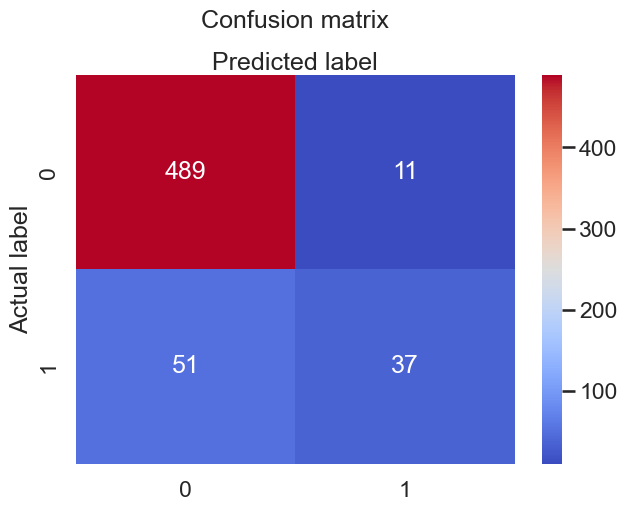

In [663]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Area Under The Curve

In [666]:
y_pred_knn_prob = model_KNN.predict_proba(x_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

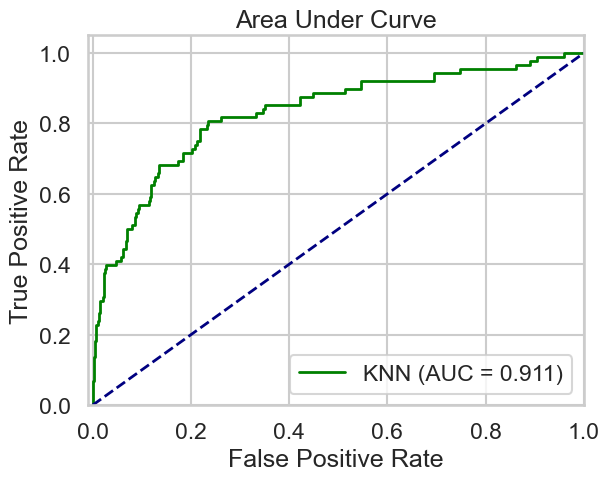

In [667]:
plt.figure(1)
lw = 2
plt.plot(fpr_log, tpr_log, color='green',
         lw=lw, label='KNN (AUC = %0.3f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Classification report

In [668]:
print('Classification Report for KNN Model:')
print(classification_report(y_test, y_pred_knn))

Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       500
           1       0.77      0.42      0.54        88

    accuracy                           0.89       588
   macro avg       0.84      0.70      0.74       588
weighted avg       0.89      0.89      0.88       588



## Comparison of Model Evaluation Values

- Models----------------------AUC Value--------Accuracy-------WeightedAvg F1

- Decision Tree------------------0.86------------0.87--------------0.86-----

- Random Forest------------------0.99------------0.96--------------0.95-----

- Support Vector Machine---------0.97------------0.97--------------0.97-----

- Logistic Regression------------0.83------------0.89--------------0.87------

- K Nearest Neighbours-----------0.91------------0.89--------------0.88------

## Conclusion

#### Since the given data set is significantly imbalanced data set with class-0 dominating over class-1, while comparing the models it is better to consider F1 score as it takes into account both precision and recall values
#### The F1 score shows a strong performance in recognizing positive cases while minimizing false positives and false negatives, Higher the F1 score better will be the model.
#### On comparison of the F1 score of all models, Support Vector Machine and Random Forest has higher score compared to others, making it the better models
